## Support Vector Machine 
### Breast Cancer Data
* 116 observations
* 9 predictors and 1 target variable
* Data source: https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra


**Read in the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bc_data = pd.read_csv('dataR2.csv',sep = ',')

**Review the first five observations of the dataset, to get a quick overview of the data and its structure.**

In [3]:
bc_data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


**Descriptive stats of selected features**

The average age is 57, and the average BMI is 27.582111, which according to the CDC is categorized as overweight. The highest glucose level is 201. It is significantly higher than the average which indicates that there are individuals with glucose regulation issues. The dataset shows moderate variability of insulin with IQR = 6.83. The minimum HOMA value is 0.467409 is fairly low. This indicates good sensitivity levels. The 25th percentile for adiponectin is 5.474283, suggesting that 25% of individuals have relatively low adiponectin levels.

CDC BMI Categories: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [4]:
bc_data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


**Number of individuals without cancer**

In [5]:
healthy_controls = bc_data[bc_data['Classification'] ==1]
healthy_controls.count()[0]

52

**Number of individuals with breast cancer**

In [6]:
bc_patients = bc_data[bc_data['Classification'] ==2]
bc_patients.count()[0]

64

**There are no missing data in this dataset**

In [7]:
bc_data.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

### Exploratory Data Analysis

The illustration includes a box plot of the distribution of ages for individuals with breast cancer(classification =2) or no breast cancer(classification = 1). The median age for individuals without breast cancer is higher than those with breast cancer. Overall, age may play a role in breast cancer development.

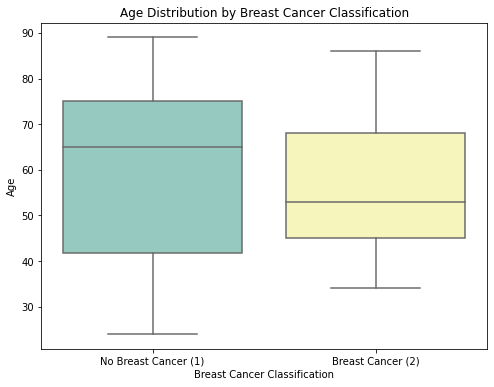

In [8]:
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(x='Classification', y='Age', data=bc_data, palette='Set3')

# Add labels and title
plt.xlabel('Breast Cancer Classification')
plt.ylabel('Age')
plt.title('Age Distribution by Breast Cancer Classification')
plt.xticks([0, 1], ['No Breast Cancer (1)', 'Breast Cancer (2)']) 
plt.show()

**Correlation matrix of the breast cancer dataset visualized  using a heatmap**

Strong positive correlation between Insulin and HOMA(r = 0.93). This indicates that as insulin levels increase, HOMA levels also increase.

A moderate negative correlation between Leptin and Adiponectin (r= -0.25). This suggests that higher levels of leptin are associated with lower levels of adiponectin.

Weak correlations between Age and the other variables in the dataset.

Positive correlation between Restin and mcp.1(r=0.36) and a moderate correlation with insulin (0.146), which indicates restin is closely related to inflammatory marker MCP.1 and insulin resistance. 

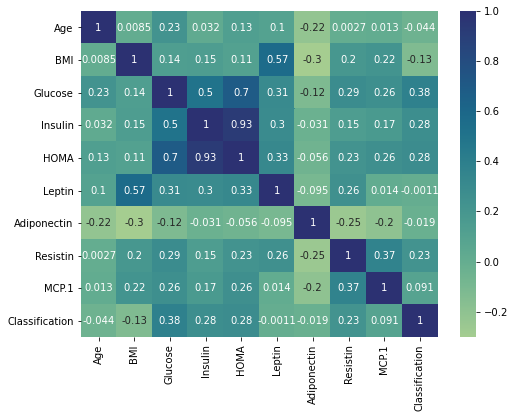

In [9]:
corr = bc_data.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True,cmap='crest')
plt.show()

**Scatter plot to illustrate the relationship between insulin level and HOMA scores. As shown by the graph, as insulin levels increase, HOMA increases. In essence, higher levels of insulin are associated with insulin resistance, as reflected by the model assessment score for HOMA**

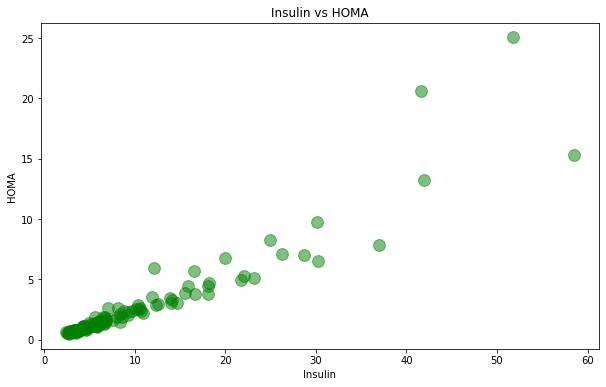

In [10]:
fig = plt.figure(figsize = (10,6))
plt.scatter(bc_data['Insulin'], bc_data['HOMA'],s= 140, alpha =0.5, c='green')
plt.title('Insulin vs HOMA')
plt.xlabel('Insulin')
plt.ylabel('HOMA')
plt.show()

**Scatter plot to illustrate the relationship between Adiponectin and BMI. As shown by the graph, there is no relationship between Adiponectin and BMI**

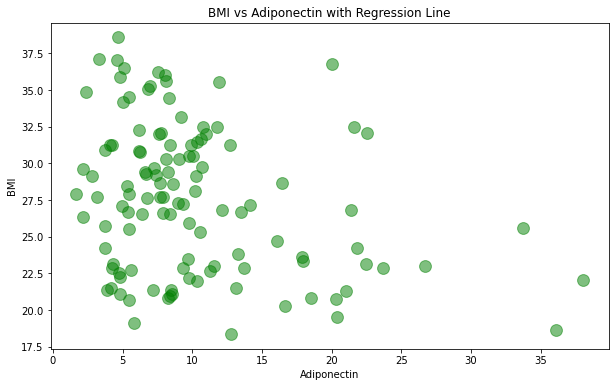

In [11]:
fig = plt.figure(figsize = (10,6))
plt.scatter(bc_data['Adiponectin'], bc_data['BMI'],s= 140, alpha =0.5, c='green')
plt.xlabel('Adiponectin')
plt.title('BMI vs Adiponectin with Regression Line')
plt.ylabel('BMI')
plt.show()

**Histogram showing the distribution of each feature**

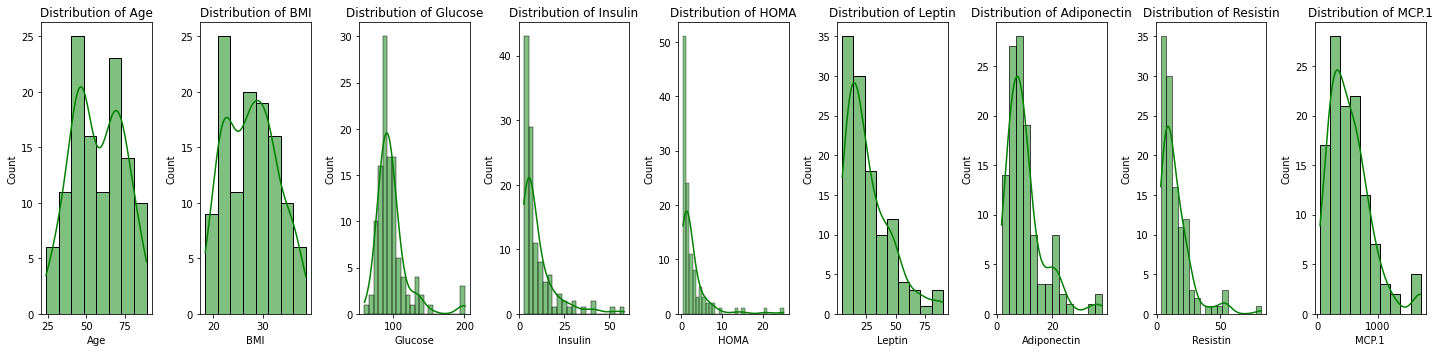

In [12]:
# Select numerical features
num_features = bc_data.drop('Classification', axis = 1)

# Create histograms for each  feature
fig, axs = plt.subplots(nrows=1, ncols=len(num_features.columns), figsize=(20, 5))

for i in range(len(num_features.columns)):
    sns.histplot(num_features[num_features.columns[i]], kde=True, ax=axs[i],color= 'green')
    axs[i].set_title(f'Distribution of {num_features.columns[i]}')

plt.tight_layout()
plt.show()

### Data Preprocessing

**Import the necessary libraries**

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

**Standardizing the data using the StandardScalar object ensures that observations are on the same scale. Standardization also prevents features with larger scales from dominating.**

In [14]:
# Initialize standard scalar
scaler = StandardScaler()

# Scale the data
X = bc_data.drop('Classification', axis=1)

# Reset index
X.reset_index(drop=True,inplace=True)  

X_scaled = scaler.fit_transform(X)

# Update data structure to dataframe
X_scaled_df= pd.DataFrame(X_scaled, columns = X.columns)

#Target variable
y= bc_data['Classification']

### Linear Support Vector Machine Classifier

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Create an instance of LinearSVC
linear_svm_model = LinearSVC(random_state= 43)

# Fit the model
linear_svm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = linear_svm_model.predict(X_test)

In [16]:
# Evaluate the model performance
print('\nClassification Report:')
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.91      0.83      0.87        12

    accuracy                           0.88        24
   macro avg       0.88      0.88      0.87        24
weighted avg       0.88      0.88      0.87        24



### Class1 - No cancer
**Precision: 85% of the model's predictions for no cancer were correct. When the model predicted no cancer, it was correct 85% of the time**
**Recall:  92% of actual no-cancer cases were correctly predicted by the model, indicating that the model successfully detected 92% of individuals who don't have cancer**
**F1 Score: 88% is the balance between recall and precision for no cancer identification**
**Sensitivity: A recall score of 92%  indicates that the model is very effective at identifying no-cancer cases(true negatives) which is critical for minimizing the risk of misdiagnosis.**

### Class2 - Cancer
**Precision: 91% of the model's predictions for cancer were correct, indicating that when the model predicted cancer, it was accurate 91 % of the time**
**Recall:  83% of actual cancer cases were correctly predicted by the model indicating that the model detected 83% of individuals who truly have cancer**
**F1 Score: 87% represents the balance between precision and recall for cancer identification**
**Sensitivity: A recall score of 83%  indicates that the model is very effective at identifying most cancer cases, but missed cases, which can lead to individauls who were not diagnosed.**


In [17]:
# ?confusion_matrix
conf_matrix_lin = confusion_matrix(y_test, predictions)
# Create DataFrame with labels
df_cm = pd.DataFrame(conf_matrix_lin, index=['Actual Positives', 'Actual Negatives'],
                     columns=['Predicted Positves', 'Predicted Negatives'])
df_cm

,Predicted Positves,Predicted Negatives
Actual Positives,11,1
Actual Negatives,2,10


**TP(11) indicates that the model correctly predicted 11 cancer cases**

**TN(10) indicates that the model predicted 10 no-cancer cases**

**FP(1)  indicates that the model incorrectly predicted cancer when no cancer was present**

**FN(2) indicates the model incorrectly predicted no cancer was present when there was cancer**

### Nonlinear Support Vector Machine Classifier

In [18]:
# Create an instance of non-LinearSVC
non_linear_svm_model = SVC(kernel = 'rbf', random_state = 43)

# Fit the model
non_linear_svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_predictions = non_linear_svm_model.predict(X_test)

### Class1 - No cancer
**Precision: 92% of the model's predictions for no cancer were correct. When the model predicted no cancer, it was correct 92% of the time**
**Recall:  92% of actual no-cancer cases were correctly predicted by the model, indicating that the model successfully detected 92% of individuals who truly do not have cancer**
**F1 Score: 92% is the balance between recall and precision for no cancer identification**
**Sensitivity: A recall score of 92%  indicates that the model is very effective at identifying no-cancer cases(true negatives) which is critical for minimizing the risk of misdiagnosis**

### Class2 - Cancer
**Precision: 92% of the model's predictions for cancer were correct, indicating that when the model predicted cancer, it was accurate 92 % of the time**
**Recall:  92% of actual cancer cases were correctly predicted by the model indicating that the model detected 92% of individuals who truly have cancer**
**F1 Score: 92% represents the balance between precision and recall for cancer identification**
***Sensitivity: A recall score of 92%  indicates that the model is very effective at identifying cancer cases, which is critical for proper diagnosis.**







In [19]:
# Evaluate the model performance
print('\nClassification Report:')
print(classification_report(y_test, y_predictions))


Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        24
   macro avg       0.92      0.92      0.92        24
weighted avg       0.92      0.92      0.92        24



In [20]:
conf_matrix_nonlin = confusion_matrix(y_test, y_predictions)
# Create DataFrame with labels
df_cm = pd.DataFrame(conf_matrix_nonlin, index=['Actual Positives', 'Actual Negatives'],
                     columns=['Predicted Positves', 'Predicted Negatives'])
df_cm

,Predicted Positves,Predicted Negatives
Actual Positives,11,1
Actual Negatives,1,11


**TP(11) indicates that the model correctly predicted 11 cancer cases**

**TN(11) indicates that the model predicted 11 no-cancer cases**

**FP(1)  indicates that the model incorrectly predicted 1 cancer case when no cancer was present**

**FN(1) indicates the model incorrectly predicted 1 no-cancer was present when there was cancer**

## Comparative Analysis
***Overall, the linear SVM model performed well as it pertains to precision, recall, and F1-score, but especially with precision for both classes. However, it has a lower recall score for Class 2, suggesting missed diagnosis which can have serious implications for an individual's life. The nonlinear model performed better than the linear model across all metrics. This indicates the model's ability to correctly identify cases of cancer and no-cancer. Overall, the nonlinear model performs better when classifying data.***